## Data Preparation

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from datetime import datetime

In [2]:
dataset = pd.read_csv('/Users/rahulmandaviya/Downloads/UberDataset.csv')

In [23]:
dataset['CATEGORY'].value_counts().unique

<bound method Series.unique of Business    1078
Personal      77
Name: CATEGORY, dtype: int64>

In [127]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY,HOURS,COST_ESTIMATE,BUSINESS_PURPOSE,Short_distance,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,2016-01-01,21.0,9.65,NaN,Book Ride,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0,2016-01-02,1.0,9.50,NaN,Book Ride,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2016-01-02,20.0,9.20,NaN,Book Ride,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,2016-01-05,17.0,9.05,NaN,Book Ride,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2016-01-06,14.0,97.55,NaN,Book Ride,Wednesday


In [38]:
dataset['PURPOSE'] = dataset['PURPOSE'].astype('category')

In [89]:
for col in ["CATEGORY", "START", "STOP", "PURPOSE"]:
    if col in dataset.columns:
        dataset[col] = dataset[col].astype(str).str.strip()

In [4]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [87]:
dataset['DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds()/60

In [16]:
dataset['PURPOSE'].fillna('Unknown',inplace = True)

In [126]:
dataset['DAY_OF_WEEK']=dataset.START_DATE.dt.day_name()
dataset['HOURS'] = dataset.START_DATE.dt.hour

In [20]:
dataset['COST_ESTIMATE'] = dataset['MILES']*1.5 + 2

## Personalized Expense Optimizer

In [44]:
Total_Miles = dataset.groupby('CATEGORY',observed = True)['MILES'].sum().sort_values(ascending = False)

In [46]:
Total_Miles.head()

CATEGORY
Business    11487.0
Personal      717.7
Name: MILES, dtype: float64

In [47]:
Total_Cost = dataset.groupby('CATEGORY',observed = True)['COST_ESTIMATE'].sum().sort_values(ascending = False)

In [48]:
Total_Cost

CATEGORY
Business    19386.50
Personal     1230.55
Name: COST_ESTIMATE, dtype: float64

In [49]:
dataset['Short_distance'] = dataset['MILES'].apply(lambda x: 'Walk/Biking' if x < 1.5 else 'Book Ride')

In [56]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY,HOURS,COST_ESTIMATE,BUSINESS_PURPOSE,Short_distance
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,2016-01-01,21.0,9.65,NaN,Book Ride
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,0 days 00:12:00,2016-01-02,1.0,9.50,NaN,Book Ride
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,2016-01-02,20.0,9.20,NaN,Book Ride
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,2016-01-05,17.0,9.05,NaN,Book Ride
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,2016-01-06,14.0,97.55,NaN,Book Ride


In [53]:
Top_5_expanse_purpose = dataset.groupby('PURPOSE',observed = True)['COST_ESTIMATE'].sum().sort_values(ascending = False)

In [82]:
count_trip = dataset.groupby(['START','STOP'],observed = True)['MILES'].count().sort_values(ascending = False)

In [92]:
category_summary = (
    dataset.groupby('CATEGORY', dropna = False)[['COST_ESTIMATE','MILES']]
    .sum()
    .sort_values('COST_ESTIMATE',ascending = False)
    .reset_index()
    )

In [93]:
category_summary

,CATEGORY,COST_ESTIMATE,MILES
0,Business,19386.50,11487.0
1,nan,18309.05,12204.7
2,Personal,1230.55,717.7


In [94]:
purpose_summary = (
    dataset.groupby('PURPOSE', dropna = False)[['COST_ESTIMATE','MILES']]
    .sum()
    .sort_values('COST_ESTIMATE',ascending = False)
    .reset_index()
    )

In [95]:
purpose_summary

,PURPOSE,COST_ESTIMATE,MILES
0,Unknown,26653.30,17098.2
1,Meeting,4650.95,2851.3
2,Customer Visit,3336.25,2089.5
3,Meal/Entertain,1687.55,911.7
4,Errand/Supplies,1018.00,508.0
5,Temporary Site,885.55,523.7
6,Between Offices,331.50,197.0
7,Commute,272.30,180.2
8,Moving,35.30,18.2
9,Airport/Travel,30.75,16.5


In [97]:
short_trip = dataset[dataset["MILES"] < 1]

In [98]:
short_trips_count = int(short_trip.shape[0])

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,DAY,HOURS,COST_ESTIMATE,BUSINESS_PURPOSE,Short_distance
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,2016-01-07,13.0,3.20,NaN,Walk/Biking
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,2.0,2016-01-26,17.0,2.75,NaN,Walk/Biking
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,5.0,2016-02-17,16.0,2.75,NaN,Walk/Biking
189,2016-03-04 16:16:00,2016-03-04 16:22:00,Business,Fayetteville Street,Depot Historic District,0.8,Errand/Supplies,6.0,2016-03-04,16.0,3.20,NaN,Walk/Biking
212,2016-03-11 10:29:00,2016-03-11 10:36:00,Business,Congress Ave District,Downtown,0.8,Unknown,7.0,2016-03-11,10.0,3.20,NaN,Walk/Biking
258,2016-03-21 16:05:00,2016-03-21 16:13:00,Business,Downtown,Midtown,0.9,Meal/Entertain,8.0,2016-03-21,16.0,3.35,NaN,Walk/Biking
292,2016-04-01 16:52:00,2016-04-01 16:57:00,Personal,Kissimmee,Kissimmee,0.7,Unknown,5.0,2016-04-01,16.0,3.05,NaN,Walk/Biking
418,2016-06-08 14:31:00,2016-06-08 14:37:00,Business,Medical Centre,Tudor City,0.7,Errand/Supplies,6.0,2016-06-08,14.0,3.05,NaN,Walk/Biking
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,2.0,2016-06-08,17.0,2.75,NaN,Walk/Biking
421,2016-06-08 17:59:00,2016-06-08 18:05:00,Business,Tribeca,Financial District,0.9,Errand/Supplies,6.0,2016-06-08,17.0,3.35,NaN,Walk/Biking


In [102]:
short_trips_savings = round(float(short_trip["COST_ESTIMATE"].sum()),2)

In [103]:
short_trips_savings

93.15

In [109]:
frequents_route = (
    dataset.groupby(['START','STOP'],dropna = False)
    .size()
    .reset_index(name='COUNT')
    .sort_values('COUNT',ascending = False)
)

In [115]:
route_summ = (
    dataset.groupby(["START", "STOP"], dropna=False)[["MILES", "COST_ESTIMATE", "DURATION"]]
      .agg({"MILES":"sum", "COST_ESTIMATE":"sum", "DURATION":"mean"})
      .reset_index()
)

In [118]:
route_summ

,START,STOP,MILES,COST_ESTIMATE,DURATION,AVG_COST_PER_RIDE
0,Agnew,Agnew,2.2,5.30,8.000000,5.300000
1,Agnew,Cory,4.3,8.45,16.000000,8.450000
2,Agnew,Renaissance,4.6,10.90,11.500000,5.450000
3,Almond,Bryson City,15.2,24.80,20.000000,24.800000
4,Apex,Apex,4.3,10.45,7.500000,5.225000
...,...,...,...,...,...,...
359,Whitebridge,Westpark Place,31.4,75.10,7.214286,5.364286
360,Whitebridge,Whitebridge,14.1,35.15,9.857143,5.021429
361,Whitebridge,Williamsburg Manor,8.3,14.45,19.000000,14.450000
362,Winston Salem,Asheville,133.6,202.40,114.000000,202.400000


In [117]:
route_summ['AVG_COST_PER_RIDE'] = (
    dataset.groupby(['START','STOP'], dropna = False)['COST_ESTIMATE']
    .mean()
    .reindex(route_summ.set_index(["START","STOP"]).index).values
)

In [124]:
route_summ = route_summ.merge(frequents_route, on=["START","STOP"], how="left")
route_summ = route_summ.sort_values(["COUNT", "COST_ESTIMATE"], ascending=[False, False])

In [125]:
route_summ

,START,STOP,MILES,COST_ESTIMATE,DURATION,AVG_COST_PER_RIDE,COUNT_x,COUNT_y,COUNT
320,Unknown Location,Unknown Location,1360.8,2213.20,32.976744,25.734884,86,86,86
205,Morrisville,Cary,395.7,743.55,14.853333,9.914000,75,75,75
46,Cary,Morrisville,380.0,704.00,15.955224,10.507463,67,67,67
40,Cary,Cary,255.9,489.85,14.981132,9.242453,53,53,53
42,Cary,Durham,390.0,657.00,20.166667,18.250000,36,36,36
...,...,...,...,...,...,...,...,...,...
184,Medical Centre,Tudor City,0.7,3.05,6.000000,3.050000,1,1,1
297,Sunnyside,Ingleside,0.7,3.05,5.000000,3.050000,1,1,1
56,Central,West Berkeley,0.6,2.90,4.000000,2.900000,1,1,1
155,Katunayaka,Katunayaka,0.5,2.75,5.000000,2.750000,1,1,1


In [128]:
hourly_usage = (
    dataset.groupby("HOURS")
      .size()
      .reset_index(name="RIDE_COUNT")
      .sort_values("HOURS")
)

In [133]:
rides_heatmap = (
    dataset.groupby(["DAY_OF_WEEK", "HOURS"])
      .size()
      .reset_index(name="COUNT"))

In [148]:
hourly_usage

,HOURS,RIDE_COUNT
0,0.0,19
1,1.0,5
2,2.0,2
3,3.0,3
4,5.0,4
5,6.0,4
6,7.0,13
7,8.0,35
8,9.0,51
9,10.0,65


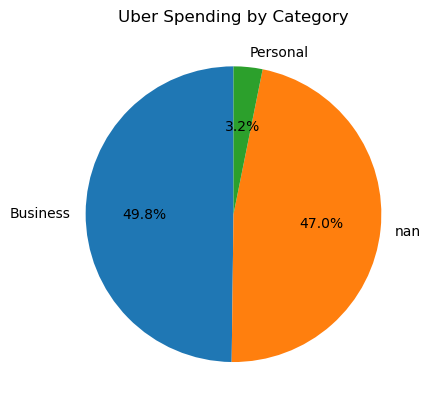

In [139]:
plt.figure()
values = category_summary['COST_ESTIMATE'].values
labels = category_summary['CATEGORY'].astype(str).values
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Uber Spending by Category")
plt.show()

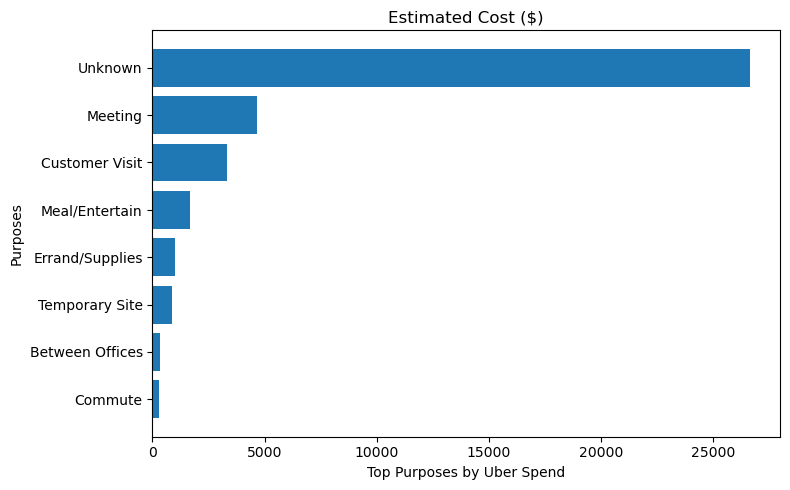

In [142]:
top_purposes = purpose_summary.head(8)
plt.figure(figsize=(8,5))
plt.barh(top_purposes["PURPOSE"].astype(str).values, top_purposes["COST_ESTIMATE"].values)
plt.title('Estimated Cost ($)')
plt.xlabel('Top Purposes by Uber Spend')
plt.ylabel('Purposes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [144]:
top_routes = frequents_route.head(10).copy()

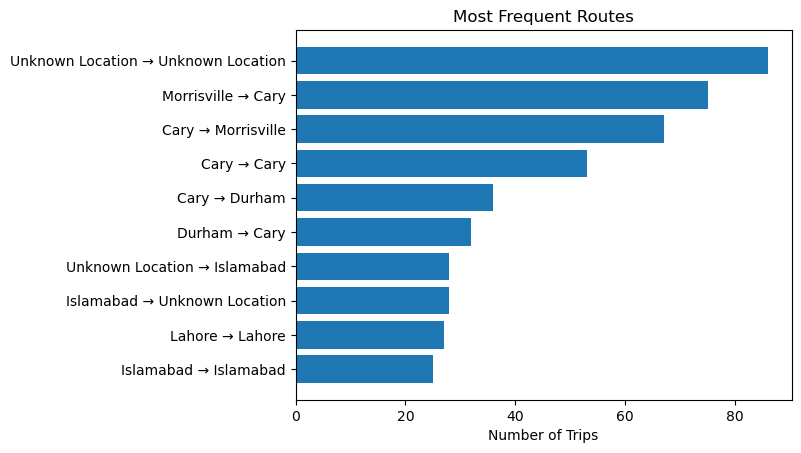

In [147]:

top_routes["ROUTE"] = top_routes["START"].astype(str) + " \u2192 " + top_routes["STOP"].astype(str)
plt.figure()
y = np.arange(len(top_routes))
plt.barh(y, top_routes["COUNT"].values)
plt.yticks(y, top_routes["ROUTE"].values)
plt.xlabel("Number of Trips")
plt.title("Most Frequent Routes")
plt.gca().invert_yaxis()
plt.show()

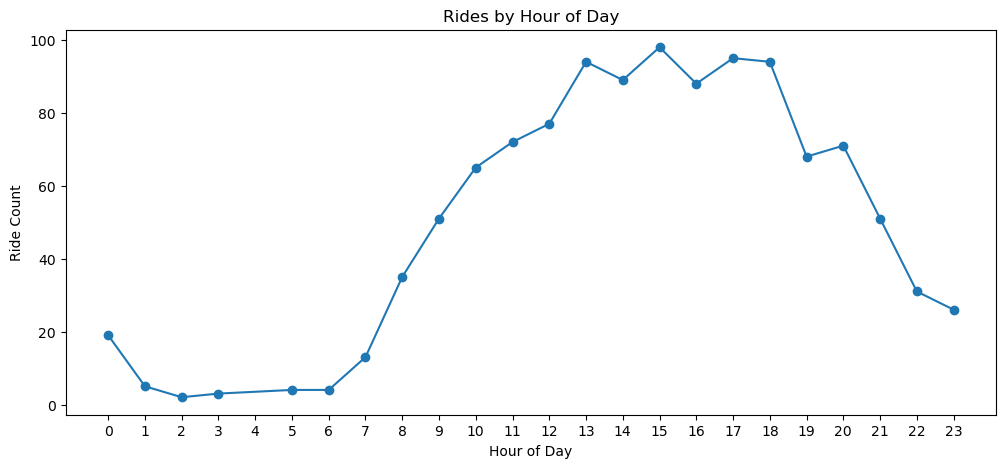

In [157]:
plt.figure(figsize=(12,5))
plt.plot(hourly_usage["HOURS"].values, hourly_usage["RIDE_COUNT"].values, marker="o")
plt.title("Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.xticks(ticks=np.arange(0, 24, 1))
plt.show()

In [161]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
rides_heatmap["DAY_OF_WEEK"] = pd.Categorical(rides_heatmap["DAY_OF_WEEK"], categories=weekday_order, ordered=True)
heatmap_pivot = rides_heatmap.pivot(index="DAY_OF_WEEK", columns="HOURS", values="COUNT").fillna(0.0)
heatmap_pivot = heatmap_pivot.loc[weekday_order]

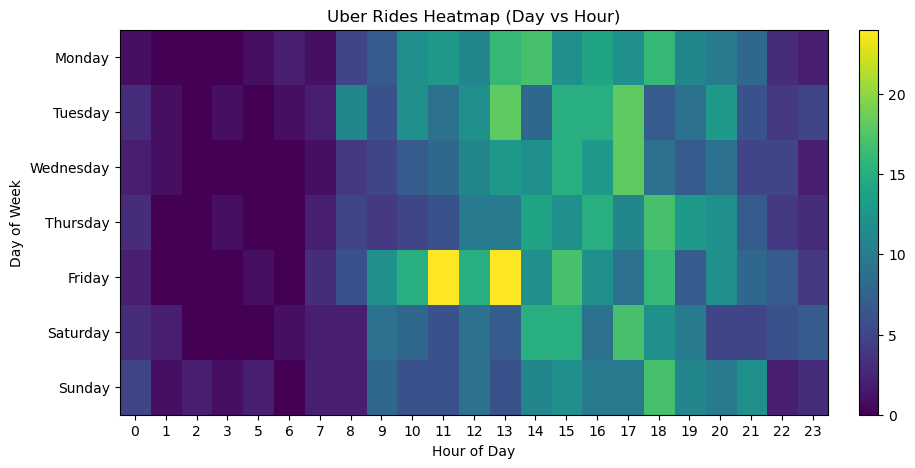

In [163]:
heatmap_matrix = heatmap_pivot.values
plt.figure(figsize=(10,5))
im = plt.imshow(heatmap_matrix, aspect="auto")
plt.title("Uber Rides Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
# x ticks
hours = list(heatmap_pivot.columns)
plt.xticks(ticks=np.arange(len(hours)), labels=[str(int(h)) for h in hours], rotation=0)
# y ticks
plt.yticks(ticks=np.arange(len(weekday_order)), labels=weekday_order)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()